# Time Series Data Prep

Time series data contains an ordered sequence of data. Python, specificaly pandas, offeres methods to manupulate the sequence in mutlipe ways that can work to better reveal time-based patterns to various models.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

## Some Basics

In [2]:

df = pd.DataFrame(randn(5,4),index='R1 R2 R3 R4 R5'.split(),columns='C1 C2 C3 C3'.split())
df

,C1,C2,C3,C3
R1,-0.246887,-1.286079,-1.655605,0.846787
R2,0.983643,1.048964,-0.975046,0.230568
R3,0.982173,-0.645699,0.389170,-1.122509
R4,1.986180,2.294867,0.418253,0.760233
R5,-0.795751,-0.863924,-0.164026,-1.320364


In [3]:
df[df['C1']>0]['C3']

,C3,C3
R2,-0.975046,0.230568
R3,0.389170,-1.122509
R4,0.418253,0.760233


In [4]:
df.reset_index()

,index,C1,C2,C3,C3
0,R1,-0.246887,-1.286079,-1.655605,0.846787
1,R2,0.983643,1.048964,-0.975046,0.230568
2,R3,0.982173,-0.645699,0.389170,-1.122509
3,R4,1.986180,2.294867,0.418253,0.760233
4,R5,-0.795751,-0.863924,-0.164026,-1.320364


In [5]:
df['Category'] = 'food travel game book flower'.split()

In [6]:
df

,C1,C2,C3,C3,Category
R1,-0.246887,-1.286079,-1.655605,0.846787,food
R2,0.983643,1.048964,-0.975046,0.230568,travel
R3,0.982173,-0.645699,0.389170,-1.122509,game
R4,1.986180,2.294867,0.418253,0.760233,book
R5,-0.795751,-0.863924,-0.164026,-1.320364,flower


In [7]:
df.set_index('Category')

,C1,C2,C3,C3
Category,,,,
food,-0.246887,-1.286079,-1.655605,0.846787
travel,0.983643,1.048964,-0.975046,0.230568
game,0.982173,-0.645699,0.389170,-1.122509
book,1.986180,2.294867,0.418253,0.760233
flower,-0.795751,-0.863924,-0.164026,-1.320364


In [8]:
df.describe()

,C1,C2,C3,C3
count,5.000000,5.000000,5.000000,5.000000
mean,0.581871,0.109626,-0.397451,-0.121057
std,1.104358,1.510293,0.902109,1.034200
min,-0.795751,-1.286079,-1.655605,-1.320364
25%,-0.246887,-0.863924,-0.975046,-1.122509
50%,0.982173,-0.645699,-0.164026,0.230568
75%,0.983643,1.048964,0.389170,0.760233
max,1.986180,2.294867,0.418253,0.846787


In [9]:
df.dtypes

C1          float64
C2          float64
C3          float64
C3          float64
Category     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, R1 to R5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C1        5 non-null      float64
 1   C2        5 non-null      float64
 2   C3        5 non-null      float64
 3   C3        5 non-null      float64
 4   Category  5 non-null      object 
dtypes: float64(4), object(1)
memory usage: 240.0+ bytes


### Repair - missing values

In [11]:
df = pd.DataFrame({'C1':[1,-2,np.nan],
                  'C2':[5,np.nan,np.nan],
                  'C3':[1,2,9]})
df

,C1,C2,C3
0,1.0,5.0,1
1,-2.0,NaN,2
2,NaN,NaN,9


In [12]:
df.dropna(axis=1) # removes columns, axis =0 (default) removes rows

,C3
0,1
1,2
2,9


In [13]:
df = pd.DataFrame({'C1':[1,-2,np.nan],
                  'C2':[5,np.nan,np.nan],
                  'C3':[1,2,9]})
df['C1'] = df['C1'].fillna(value=df['C1'].mean())
df

,C1,C2,C3
0,1.0,5.0,1
1,-2.0,NaN,2
2,-0.5,NaN,9


### Identifing Unique Entries within a row

In [14]:
df['C2'].nunique()

1

## Resample

In [15]:
df = pd.read_csv('data/starbucks.csv', index_col='Date', parse_dates=True)
df.head

<bound method NDFrame.head of               Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548
...             ...       ...
2018-12-24  60.5600   6323252
2018-12-26  63.0800  16646238
2018-12-27  63.2000  11308081
2018-12-28  63.3900   7712127
2018-12-31  64.4000   7690183

[1006 rows x 2 columns]>

In [16]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [17]:
# Yearly Means
df.resample(rule='QS').mean()

,Close,Volume
Date,,
2015-01-01,42.033705,1.005831e+07
2015-04-01,47.622476,7.375698e+06
2015-07-01,52.742539,9.206285e+06
2015-10-01,57.498228,8.002620e+06
2016-01-01,55.171702,1.093832e+07
2016-04-01,54.050434,8.582716e+06
2016-07-01,53.350578,8.996589e+06
2016-10-01,53.040917,8.753118e+06
2017-01-01,54.447013,9.846263e+06


## Time Shifting

In [18]:
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [19]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [20]:
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## Rolling/Expanding Time Slices

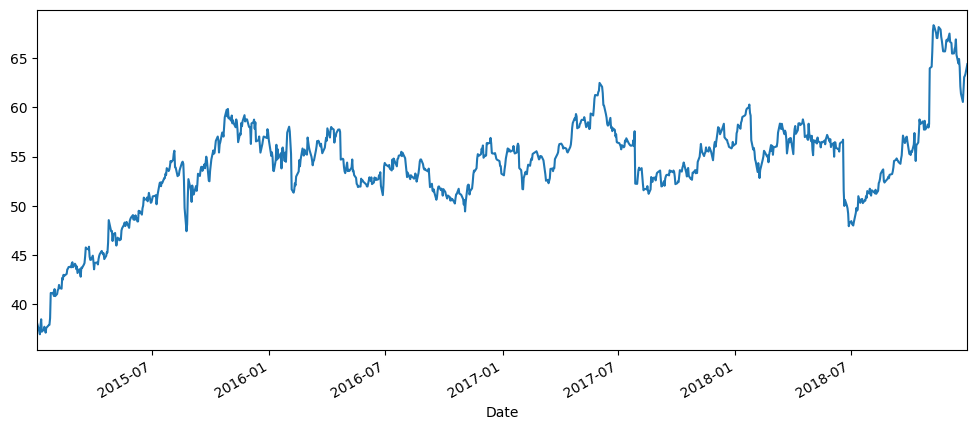

In [21]:
# Start fresh
df = pd.read_csv('data/starbucks.csv', index_col='Date', parse_dates=True)
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

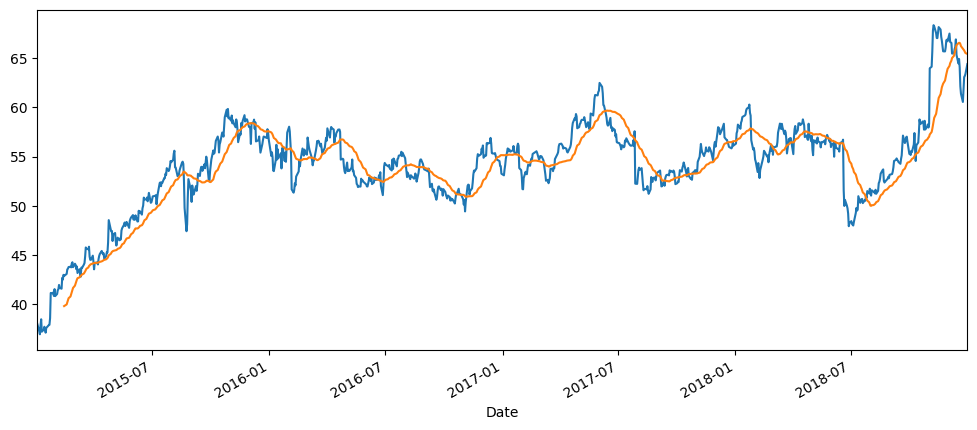

In [22]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

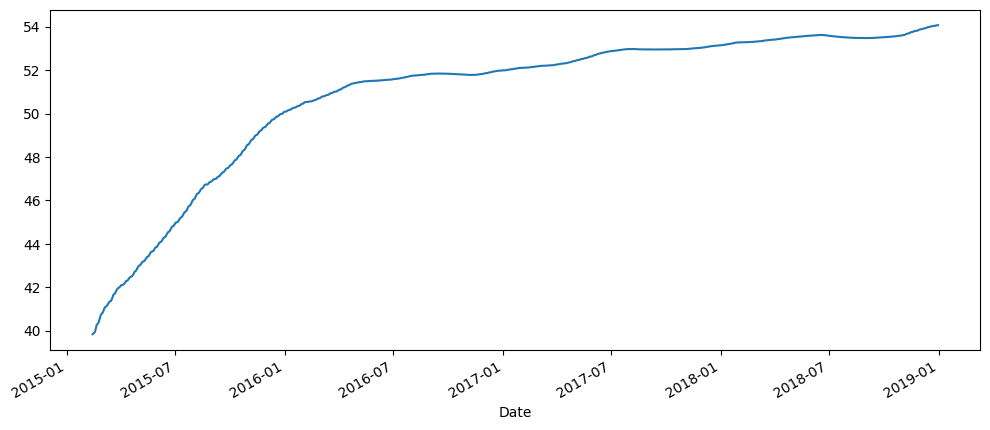

In [23]:
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));